# Fitting a linear model predicting rings using only the variables: Sex (as a factor) and Whole Weight 

## Preparing the Data


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('../data/processed/abalone.csv')



In [2]:
#Converting Sex to Categorical Variable
data['Sex'] = data['Sex'].map({0 : 'M', 1 : 'F', 2 : 'I'})


data['Sex'] = data['Sex'].astype('category')
print(data['Sex'].unique())

['M', 'F', 'I']
Categories (3, object): ['F', 'I', 'M']


## Fitting the Linear Model

In [3]:
# Fitting the Linear Model

import statsmodels.formula.api as smf
model_interact = smf.ols(formula='Rings ~ C(Sex) * Q("Whole weight")', data=data).fit()

print(model_interact.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     452.8
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:18:09   Log-Likelihood:                -9895.5
No. Observations:                4172   AIC:                         1.980e+04
Df Residuals:                    4166   BIC:                         1.984e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## Comments

### Key Statistics  
- **R-squared**: 0.352, meaning 35.2% of variation in Rings explained  
- **F-statistic**: 452.8 (p < 0.001) → the model explains variance in Rings 452.8 times better than a model with no predictors, indicating a strong significance overall  
- **Residuals**: Skew = 1.62, Kurtosis = 6.92 shows that model is not perfectly normal but acceptable due to large sample size  

### Coefficients  
- **Females**: Intercept = 9.12, Slope = 1.92  
- **Infants**: Intercept = 5.27, Slope = 6.09  
- **Males**: Intercept = 8.32, Slope = 2.41  

### Significance  
- All coefficients (main and interaction terms) have p < 0.05, meaning all variables are significant  

### Interpretation  
- Slopes and intercepts differ by sex  
- Whole Weight has a strong effect on Rings  
- Infants show the steepest increase in Rings with weight  


# Fitting a linear model with all the original variables, (without transforming predictors and without interactions)

In [4]:
import statsmodels.formula.api as smf

#Our Predictors are Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight and Shell weight
# Fit the original model using all original predictors
model_original = smf.ols(
    formula='Rings ~ C(Sex) + Length + Diameter + Height + Q("Whole weight") + Q("Shucked weight") + Q("Viscera weight") + Q("Shell weight")',
    data=data
).fit()

# Display the model summary
print(model_original.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     549.8
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:18:09   Log-Likelihood:                -9166.7
No. Observations:                4172   AIC:                         1.835e+04
Df Residuals:                    4162   BIC:                         1.842e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.5967    

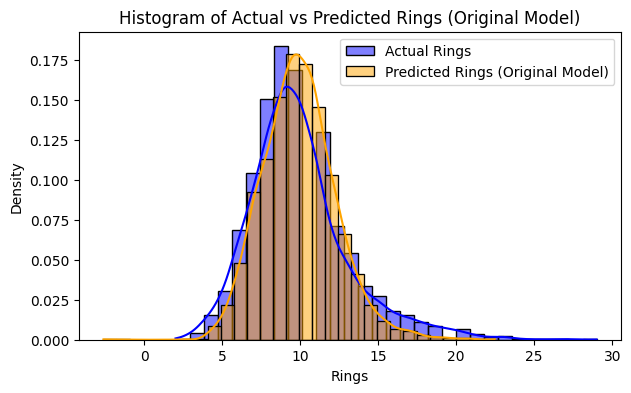

In [5]:
# Visualizing the model in Histplot
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_original = model_original.predict(data)

# Plot histogram of actual vs predicted
plt.figure(figsize=(7,4))
sns.histplot(data['Rings'], kde=True, color='blue', label='Actual Rings', stat='density', bins=30)
sns.histplot(y_pred_original, kde=True, color='orange', label='Predicted Rings (Original Model)', stat='density', bins=30)
plt.title('Histogram of Actual vs Predicted Rings (Original Model)')
plt.xlabel('Rings')
plt.ylabel('Density')
plt.legend()
plt.show()

## Comments

### Key Statistics
- **R-squared**: 0.543, meaning that the model explains 54.3% of variation in Rings
- **Residuals**: Skew = 1.19, Kurtosis = 6.03, which is slightly non-normal, however acceptable due to large sample size  

### Coefficients
- **Length** has a negative coefficient, which is likely multicollinearity with Diameter  
- **C(Sex)[T.M]** and **Length** are not significant (p > 0.05)  
- **Whole Weight** is positive, but **Shucked** and **Viscera Weights** are negative  

### Interpretation
- Some predictors behave unexpectedly due to multicollinearity  
- Sex contributes very little once physical features are included  
- Males and Females have similar predicted Rings in this model  

### Visual Interpretation
- Predicted values are centered well (esp. 8–12 rings range)  
- Distribution is narrower and more peaked than actual values  
- Model underestimates variability and misses high-end extremes  

# Fitting the model after PCA

In [6]:
%pip install scikit-learn
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Transforming the Predictors

In [8]:
# Choosing the predictors and target variable
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
X = data[features]
y = data['Rings'] # Target variable

In [9]:
# Standardizing the features to have mean=0 and std = 1, as PCA is scale-sensitive
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Applying PCA and choosing PCs

In [10]:
pca = PCA()

X_pca = pca.fit_transform(X_scaled)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance = np.cumsum(pca.explained_variance_ratio_)

for i in range(1, len(explained_variance)+1):
    print(f"Explained variance by the first {i} components: {explained_variance[i-1]*100:.2f}%")

Explained variance by the first 1 components: 92.45%
Explained variance by the first 2 components: 95.50%
Explained variance by the first 3 components: 97.49%
Explained variance by the first 4 components: 98.81%
Explained variance by the first 5 components: 99.72%
Explained variance by the first 6 components: 99.91%
Explained variance by the first 7 components: 100.00%


**Comment**

We can see that based on the explained variance, we select the 1st **2 PCs** for our modelling, as they capture **over 95% of variance** in data, which is more than enough for dimensionality reduction.

## Fitting Linear Regression Model with 2 PCs

In [12]:
import statsmodels.api as sm

# PCA with 2 components
X_pca_reduced = X_pca[:, :2]  
X_with_const = sm.add_constant(X_pca_reduced)
model = sm.OLS(y, X_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     1440.
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:18:12   Log-Likelihood:                -9705.1
No. Observations:                4172   AIC:                         1.942e+04
Df Residuals:                    4169   BIC:                         1.944e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9377      0.038    258.978      0.0

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_scaled)  # Make sure X_scaled is your standardized data



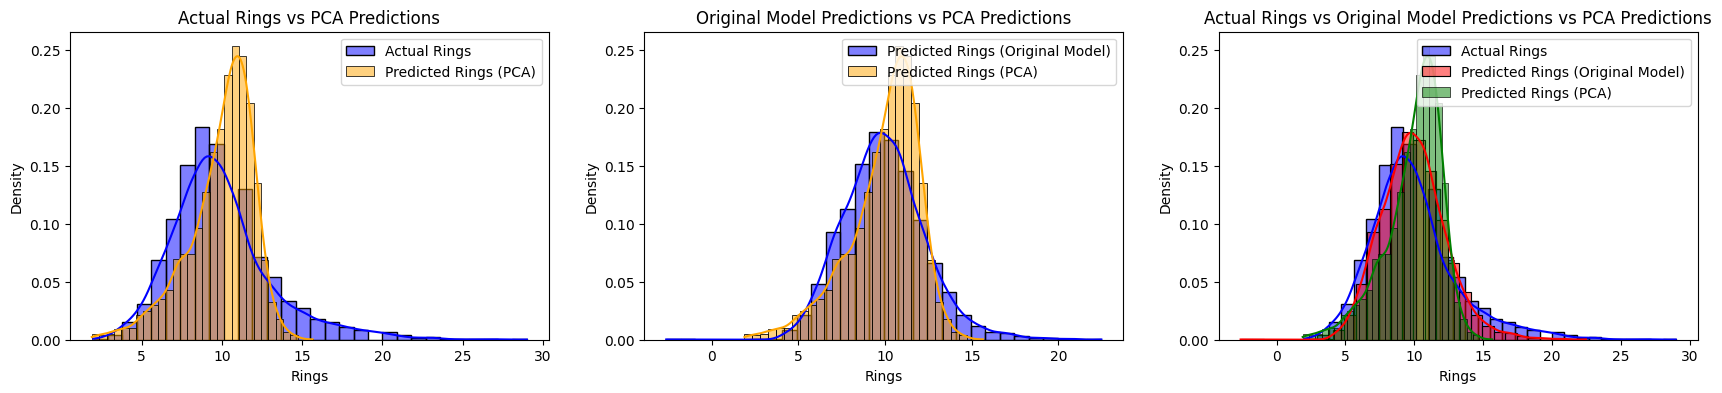

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

y = data['Rings']
y_pred_pca = model.predict(X_with_const)
plt.figure(figsize=(21, 4))

# Histogram of actual vs predicted rings from PCA model
plt.subplot(1, 3, 1)
sns.histplot(y, bins=30, color='blue', label='Actual Rings', kde=True, stat='density', alpha=0.5)
sns.histplot(y_pred_pca, bins=30, color='orange', label='Predicted Rings (PCA)', kde=True, stat='density', alpha=0.5)
plt.title('Actual Rings vs PCA Predictions')
plt.xlabel('Rings')
plt.ylabel('Density')
plt.legend()

#Histogram of predicted rings from both models
plt.subplot(1, 3, 2)
sns.histplot(y_pred_original, bins=30, color='blue', label='Predicted Rings (Original Model)', kde=True, stat='density', alpha=0.5)
sns.histplot(y_pred_pca, bins=30, color='orange', label='Predicted Rings (PCA)', kde=True, stat='density', alpha=0.5)
plt.title('Original Model Predictions vs PCA Predictions')
plt.xlabel('Rings')
plt.ylabel('Density')
plt.legend()

# Histogram of actual vs predicted rings from both models
plt.subplot(1, 3, 3)
sns.histplot(y, bins=30, color='blue', label='Actual Rings', kde=True, stat='density', alpha=0.5)
sns.histplot(y_pred_original, bins=30, color='red', label='Predicted Rings (Original Model)', kde=True, stat='density', alpha=0.5)
sns.histplot(y_pred_pca, bins=30, color='green', label='Predicted Rings (PCA)', kde=True, stat='density', alpha=0.5)
plt.title('Actual Rings vs Original Model Predictions vs PCA Predictions')
plt.xlabel('Rings')
plt.ylabel('Density')
plt.legend()



## Comments

### Key Statistics
- **R-squared**: 0.409 → model explains 40.9% of variation in Rings  
- **Residuals**: Skew = 1.59, Kurtosis = 6.72 → non-normal, acceptable for large dataset  

### Coefficient Observations
- **PC1** and **PC2** are both statistically significant (p < 0.0001)  
- **PC2** has a larger impact (coef = 2.03) than **PC1** (coef = 0.72)  

### Visual Interpretation
- Predicted distribution is narrower, more peaked, and right-skewed  
- PCA model underestimates variability and misses extreme values  
- Original model predictions better align with actual values  

### Comparing PCA Prediction Model vs Original Prediction Model

- **PCA model**: R² = 0.409, which is less accurate than original model (R² = 0.543)  
- **Original model** predictions align more closely with actual Rings  
- **PCA** removes multicollinearity, which improves model stability  
- **PCA** reduces interpretability, which means PCs are not easily explained  
- **PCA predictions** are more concentrated and miss extreme values  
- **Original model** shows better variability and generalization  

